# Desintegración Tau-muón

Las leyes de la naturaleza aseguran que algunas cantidades físicas, como la energía y el momento, se conservan. Gracias al teorema de Noether sabemos que cada ley de conservación está asociada con una simetría. Por ejemplo, la conservación de la energía está asociada a la invarianza temporal de los sistemas físicos, es decir, el resultado de un experimento debería ser el mismo hoy o mañana. El hecho de que un sistema físico se comporte de la misma manera, sin importar donde se localice o como esté orientado, surge de la conservación del momento lineal o del momento angular.

Las simetrías son también cruciales en la estructura del Modelo Standard de la Física de partículas, la actual teoría de interacciones a nivel microscópico. Algunas son intrínsecas al modelo, otras surgen accidentalmente de él. En el Modelo Standard, el 'sabor' leptónico, el número de electrones y electrones-neutrinos, muones y muones-neutrinos, y tau y tau-neutrinos, es una de esas cantidades conservadas.

<img src="standardmodel.png">

Es interesante notar que en muchas extensiones propuestas del Modelo Standard ésta simetría no existe, lo que implica que desintegraciones que no conserven el 'sabor' leptónico son posibles. Una desintegración buscada en el LHC es τ → μμμ (τ → 3μ). Observaciones de éste tipo de desintegración sería una clara evidencia de la violación de la conservación del 'sabor' leptónico y abriría la puerta a una nueva Física.


<img src="front_page.png">


Éste trabajo, basándose en datos reales del LHC, trata de descubrir si eso es posible.


Fuente:
https://www.kaggle.com/c/flavours-of-physics/overview

In [1]:
# se importan librerias

import time                                                   # para tiempo
import pandas as pd                                           # dataframe
import matplotlib.pyplot as plt                               # para plots
%matplotlib inline
import seaborn as sns                                         # para plots
import numpy as np                                            # numerical python, algebra lineal

from sklearn.model_selection import train_test_split          # separa datos 
from sklearn.preprocessing import StandardScaler              # normalizacion de los datos
from sklearn.linear_model import LogisticRegression           # regresion logistica (clasificador)
from sklearn.svm import SVC                                   # svm clasificador
from sklearn.ensemble import RandomForestClassifier           # bosque clasificador
from sklearn.neighbors import KNeighborsClassifier            # k-vecino mas cercano clasificador  
from sklearn.ensemble import GradientBoostingClassifier       # grad. boost
from sklearn.neural_network import MLPClassifier              # Redes Neuronales, multilayer perceptron
from sklearn.model_selection import GridSearchCV              # grid search validacion cruzada 
from sklearn.metrics import confusion_matrix, accuracy_score  # metricas
from sklearn.metrics import roc_curve                         # curva ROC 
from sklearn.metrics import roc_auc_score                     # area bajo la curva ROC


from xgboost import XGBClassifier                             # xgboosting

from imblearn.over_sampling import SMOTE                      # muestreo desbalanceado

from qiskit import QuantumRegister                            # librerias cuanticas
from qiskit import ClassicalRegister
from qiskit import QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit import IBMQ

import warnings                                               # avisos
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning) 
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning) 
warnings.filterwarnings("ignore")

In [2]:
muon=pd.read_csv('training.csv')  # se cargan los datos

In [3]:
muon.columns   # se observan las columnas

Index(['id', 'LifeTime', 'dira', 'FlightDistance', 'FlightDistanceError', 'IP',
       'IPSig', 'VertexChi2', 'pt', 'DOCAone', 'DOCAtwo', 'DOCAthree',
       'IP_p0p2', 'IP_p1p2', 'isolationa', 'isolationb', 'isolationc',
       'isolationd', 'isolatione', 'isolationf', 'iso', 'CDF1', 'CDF2', 'CDF3',
       'ISO_SumBDT', 'p0_IsoBDT', 'p1_IsoBDT', 'p2_IsoBDT', 'p0_track_Chi2Dof',
       'p1_track_Chi2Dof', 'p2_track_Chi2Dof', 'p0_IP', 'p1_IP', 'p2_IP',
       'p0_IPSig', 'p1_IPSig', 'p2_IPSig', 'p0_pt', 'p1_pt', 'p2_pt', 'p0_p',
       'p1_p', 'p2_p', 'p0_eta', 'p1_eta', 'p2_eta', 'SPDhits', 'production',
       'signal', 'mass', 'min_ANNmuon'],
      dtype='object')

In [4]:
muon.info()    # se mira el tipo de datos de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67553 entries, 0 to 67552
Data columns (total 51 columns):
id                     67553 non-null int64
LifeTime               67553 non-null float64
dira                   67553 non-null float64
FlightDistance         67553 non-null float64
FlightDistanceError    67553 non-null float64
IP                     67553 non-null float64
IPSig                  67553 non-null float64
VertexChi2             67553 non-null float64
pt                     67553 non-null float64
DOCAone                67553 non-null float64
DOCAtwo                67553 non-null float64
DOCAthree              67553 non-null float64
IP_p0p2                67553 non-null float64
IP_p1p2                67553 non-null float64
isolationa             67553 non-null int64
isolationb             67553 non-null int64
isolationc             67553 non-null int64
isolationd             67553 non-null float64
isolatione             67553 non-null float64
isolationf             67

In [5]:
null=muon.isnull().sum()   
null[null>0]              # lista vacia, los datos estan limpios

Series([], dtype: int64)

In [6]:
muon.head()   # se observan los 5 primeros registros

,id,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,...,p1_p,p2_p,p0_eta,p1_eta,p2_eta,SPDhits,production,signal,mass,min_ANNmuon
0,18453471,0.001578,0.999999,14.033335,0.681401,0.016039,0.451886,1.900433,1482.037476,0.066667,...,12290.760742,39264.398438,3.076006,4.003800,4.031514,458,-99,0,1866.300049,0.277559
1,5364094,0.000988,0.999705,5.536157,0.302341,0.142163,9.564503,0.865666,3050.720703,0.024022,...,16562.667969,7341.257812,3.228553,2.786543,2.975564,406,-99,0,1727.095947,0.225924
2,11130990,0.000877,0.999984,6.117302,0.276463,0.034746,1.970751,10.975849,3895.908691,0.055044,...,22695.388672,10225.309570,3.536903,2.865686,3.052810,196,-99,0,1898.588013,0.368630
3,15173787,0.000854,0.999903,5.228067,0.220739,0.076389,4.271331,3.276358,4010.781738,0.053779,...,16909.515625,9141.426758,3.087461,3.218034,2.375592,137,-99,0,1840.410034,0.246045
4,1102544,0.001129,0.999995,39.069534,1.898197,0.120936,4.984982,0.468348,4144.546875,0.004491,...,97612.804688,47118.785156,4.632295,4.711155,4.296878,477,-99,0,1899.793945,0.222060


In [7]:
X=muon.drop(columns=['id', 'production', 'signal', 'mass', 'min_ANNmuon']) 
# estas columnas no estan en test

y=muon.signal  # lo que se va a predecir, desintegracion tau-muon

In [8]:
X.head()

,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,DOCAtwo,...,p0_pt,p1_pt,p2_pt,p0_p,p1_p,p2_p,p0_eta,p1_eta,p2_eta,SPDhits
0,0.001578,0.999999,14.033335,0.681401,0.016039,0.451886,1.900433,1482.037476,0.066667,0.060602,...,353.819733,448.369446,1393.246826,3842.096436,12290.760742,39264.398438,3.076006,4.003800,4.031514,458
1,0.000988,0.999705,5.536157,0.302341,0.142163,9.564503,0.865666,3050.720703,0.024022,0.019245,...,656.524902,2033.918701,747.137024,8299.368164,16562.667969,7341.257812,3.228553,2.786543,2.975564,406
2,0.000877,0.999984,6.117302,0.276463,0.034746,1.970751,10.975849,3895.908691,0.055044,0.047947,...,658.523743,2576.380615,963.652466,11323.134766,22695.388672,10225.309570,3.536903,2.865686,3.052810,196
3,0.000854,0.999903,5.228067,0.220739,0.076389,4.271331,3.276358,4010.781738,0.053779,0.006417,...,1047.216187,1351.734131,1685.003662,11502.081055,16909.515625,9141.426758,3.087461,3.218034,2.375592,137
4,0.001129,0.999995,39.069534,1.898197,0.120936,4.984982,0.468348,4144.546875,0.004491,0.037326,...,1442.538208,1755.792236,1282.428711,74117.117188,97612.804688,47118.785156,4.632295,4.711155,4.296878,477


Text(0.5, 1.0, 'HeatMap Correlation')

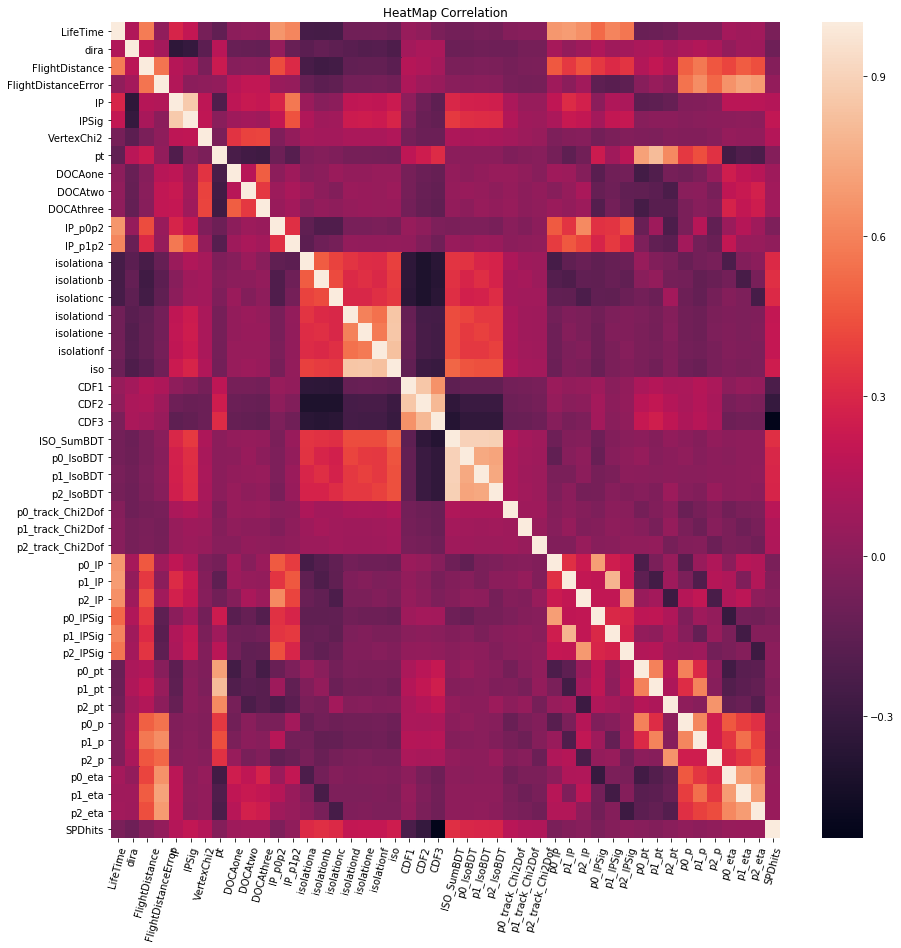

In [9]:
plt.figure(figsize=(15,15))          # heatmap de correlacion
sns.heatmap(X.corr())
plt.yticks(rotation=0)
plt.xticks(rotation=75)
plt.title('HeatMap Correlation')

In [10]:
columns_to_drop=[]                   # con esto observo las columnas colineales
for c in X.columns:
    for i in range(len(X.corr())):
        if abs(X.corr()[c][i])>0.9 and abs(X.corr()[c][i])<0.97:columns_to_drop.append(c)
columns_to_drop=list(set(columns_to_drop))   
len(columns_to_drop)
# segun el criterio no hay colinealidad
# esto se puede hacer también por el método de Gauss, aunque requiere más computo

0

In [11]:
X_s=StandardScaler().fit_transform(X)   # se normalizan los datos

X_train, X_test, y_train, y_test=train_test_split(X_s, y, test_size=0.2)  # se separan los datos

# Modelos

Se escogen seis tipos diferentes de clasificadores y se buscan los hiperparámetros más adecuados para cada uno de ellos. Además, se introduce un muestreo aleatorio de los datos para dicha búsqueda. 

In [12]:
# modelos

# regresion logistica
# solvers='newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'liblinear'
logreg=LogisticRegression(C=1.0, solver='lbfgs', tol=1e-6, max_iter=500, penalty='l2')

# support vector classifier
# kernels='linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
svc=SVC(C=1.0, kernel='rbf',gamma='auto', tol=1e-4, max_iter=500, probability=True)

# bosque aleatorio
#criterios='gini', 'entropy'
bosque=RandomForestClassifier(n_estimators=100, criterion='gini')

# k-vecinos mas cercanos
#pesos='uniform', 'distance'
# p=1=> manhattan, p=2=>euclidea, p>2=>norma>2
knn=KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2)

# grad. boost (como Adaboost)
# perdida=exponencial=>Adaboost
gb=GradientBoostingClassifier(loss='exponential', learning_rate=0.1, n_estimators=100)

# perceptron multicapa
# activacion='identity' ,'relu', 'logistic', 'tanh'
mlp=MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=500)

# xgboosting
# funcion objetivo='binary:logistic'
# lambda=>default=1
xgb=XGBClassifier(learning_rate=0.1, n_estimators=1000, objective= 'binary:logistic')

In [13]:
# muestreo verdaderamente aleatorio

def token(token):          # lectura del token desde .txt
    with open(token, 'r') as f:
        t=f.readlines()[0].split('\n')[0]
    return t


def random_sample(df, sample_size, n_bits=5):
    lista_num=[]                                   #lista de numeros aleatorios
    while len(lista_num)<sample_size:
        qubit=QuantumRegister(3)                   # qubits
        clasico=ClassicalRegister(3)               # registro
        circuito=QuantumCircuit(qubit, clasico)    # circuito cuantico
        circuito.h(qubit)
        circuito.measure(qubit, clasico)
        
        # crear cuenta en https://quantumexperience.ng.bluemix.net/qx/
        
        IBMQ.enable_account(token('ibm_token.txt'))                 # cuenta IBM
        IBMQ.load_accounts()
        backend=IBMQ.get_backend('ibmq_5_tenerife')                 # procesador cuantico
        #backend=BasicAer.get_backend('qasm_simulator')             # simulador (pseudorandom)
        job=execute(circuito, backend, shots=n_bits, memory=True)   # ejecucion
        
        datos=job.result().get_memory()                             # lista de bits
        numero=int(''.join(datos), 2)                               # pasa binario a entero
        
        if numero not in lista_num and numero<=len(df):lista_num.append(numero)
    
    return df.iloc[lista_num]

display (random_sample(muon, 5))

,id,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,...,p1_p,p2_p,p0_eta,p1_eta,p2_eta,SPDhits,production,signal,mass,min_ANNmuon
25737,3613443,0.000472,0.999948,4.508567,0.447812,0.044141,3.061473,4.897687,4064.932129,0.118971,...,40282.921875,16473.468750,3.504624,3.303030,3.310171,208,-99,0,1941.204956,0.369917
16102,11943855,0.002447,0.999964,14.366718,0.133413,0.118343,12.041788,3.151457,4149.170410,0.006770,...,21057.058594,12331.873047,2.962262,3.051951,2.529531,229,-99,0,1939.051025,0.205288
1848,15814841,0.000672,0.999947,4.996439,0.166560,0.049900,4.597600,2.197109,8545.850586,0.026164,...,18088.841797,14526.085938,2.593455,2.070288,2.287295,444,-99,0,1623.457031,0.275601
1087,12895349,0.000345,0.999901,4.402282,0.699995,0.059923,3.868253,7.261536,4542.883789,0.067086,...,11034.537109,58674.320312,3.249272,3.403181,3.517427,224,-99,0,1830.149048,0.313884
15136,523805,0.002712,0.999999,23.474623,0.354755,0.041283,2.409126,2.138400,3813.123779,0.026885,...,20824.396484,24679.253906,3.105134,2.957445,4.014681,561,-99,0,1894.557007,0.252584


In [14]:
# muestra aleatoria simple de los datos
# para no probar el gridsearch con todos los datos (10% de los datos)
# con resampling

df_mas=muon.sample(n=int(0.1*len(X)))
X_mas=df_mas.drop(columns=['id', 'production', 'signal', 'mass', 'min_ANNmuon']) 
y_mas=df_mas.signal
X_s_mas=StandardScaler().fit_transform(X_mas)   # se normalizan los datos
X_mas_train, X_mas_test, y_mas_train, y_mas_test=train_test_split(X_s_mas, y_mas, test_size=0.2)

X_res_train, y_res_train=SMOTE().fit_resample(X_mas_train, y_mas_train)
X_res_test, y_res_test=SMOTE().fit_resample(X_mas_test, y_mas_test)

In [15]:
# funcion para plots y gridsearch

def grid(modelo, param, cv=5):
    inicio=time.time()
    grid=GridSearchCV(modelo, param, cv=cv, iid=True, return_train_score=True, n_jobs=-1)
    grid.fit(X_res_train, y_res_train)
    
    print ('Test acierto (mas): {:.2f}'.format(grid.score(X_res_test, y_res_test)))
    print ('Mejores parametros: {}'.format(grid.best_params_))
    print ('Mejor acierto cross-val: {:.2f}'.format(grid.best_score_))
    
    params=list(grid.best_params_.keys())
    best_params=list(grid.best_params_.values())
    
    y_p=grid.best_estimator_.fit(X_train, y_train)  # se entrena el mejor con todos los datos
    y_pred=y_p.predict(X_test) 
    y_prob=y_p.predict_proba(X_test)[::,1]

    print ('\nTest exactitud :{:.4f}\n'.format(accuracy_score(y_test, y_pred)))
    confusion=confusion_matrix(y_test, y_pred)
    sns.heatmap((confusion/len(y_pred)*100),annot=True)   # plot matriz confusion
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.title('Confusion Matrix(%)')
    plt.show()
    
    fpr, tpr, umbrales=roc_curve(y_test, y_pred)   # plot curva roc binaria (con auc)
    auc=roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, 'r--')   # umbral (0.5)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Binary ROC Curve---AUC={:.3f}'.format(auc))
    plt.show()
    
    fpr2, tpr2, umbrales2=roc_curve(y_test, y_prob)   # plot curva roc (con auc)
    auc2=roc_auc_score(y_test, y_prob)
    plt.plot(fpr2, tpr2)
    plt.plot(fpr2, fpr2, 'r--')  
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Prob ROC Curve---AUC={:.3f}'.format(auc2))
    plt.show()
    
    print ("Tiempo : {:.3f} segundos".format(time.time()-inicio)) # tiempo gridsearching

Test acierto (mas): 0.85
Mejores parametros: {'C': 0.1, 'solver': 'saga'}
Mejor acierto cross-val: 0.85

Test exactitud :0.8535



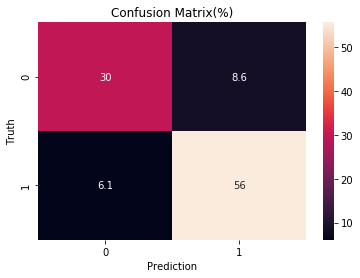

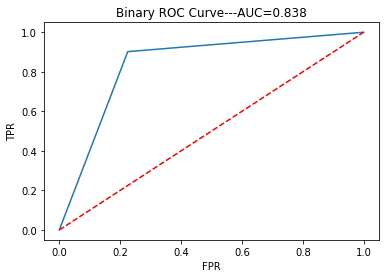

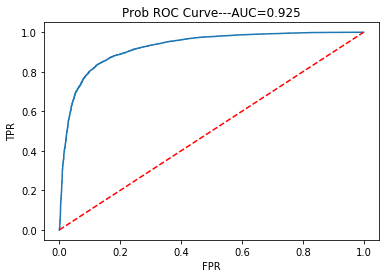

Tiempo : 157.259 segundos


In [16]:
# modelo LogReg
param={'C':[0.001, 0.01, 0.1, 1, 10, 100],
       'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'liblinear']}
grid(logreg, param)

Test acierto (mas): 0.80
Mejores parametros: {'C': 10, 'gamma': 0.1}
Mejor acierto cross-val: 0.86

Test exactitud :0.6156



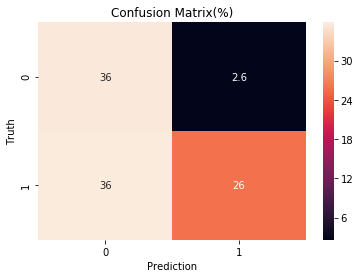

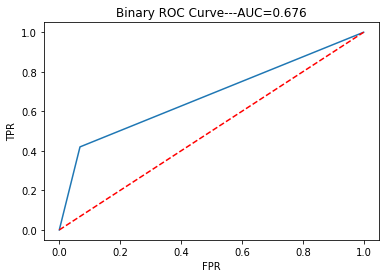

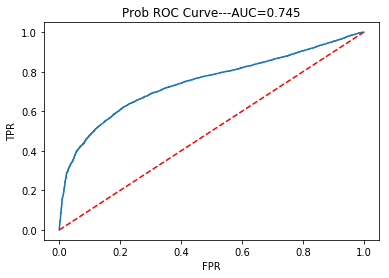

Tiempo : 719.212 segundos


In [17]:
# modelo SVC
param={'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
grid(svc, param)

Test acierto (mas): 0.85
Mejores parametros: {'criterion': 'entropy', 'n_estimators': 100}
Mejor acierto cross-val: 0.88

Test exactitud :0.8722



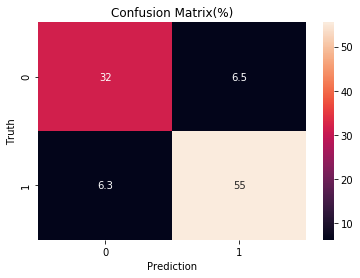

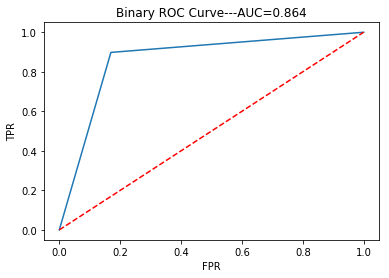

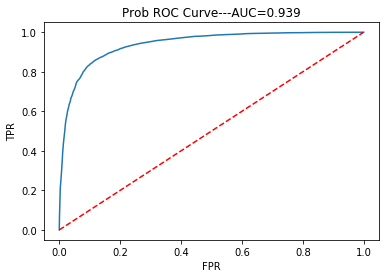

Tiempo : 195.283 segundos


In [18]:
# modelo bosque aleatorio
param={'n_estimators':[1, 10, 100], 'criterion':['gini', 'entropy']}
grid(bosque, param)

Test acierto (mas): 0.81
Mejores parametros: {'n_neighbors': 5, 'weights': 'distance'}
Mejor acierto cross-val: 0.87

Test exactitud :0.8357



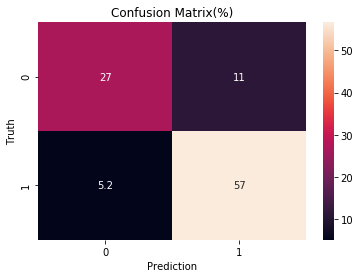

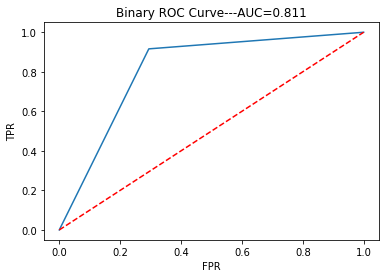

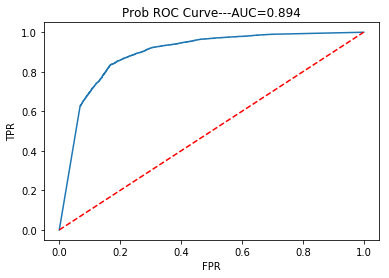

Tiempo : 727.587 segundos


In [19]:
# modelo knn
param={'n_neighbors':[3, 5, 7, 9, 13, 17], 'weights':['uniform', 'distance']}
grid(knn, param)

Test acierto (mas): 0.88
Mejores parametros: {'learning_rate': 0.5, 'n_estimators': 300}
Mejor acierto cross-val: 0.89

Test exactitud :0.8871



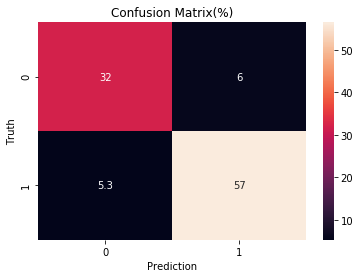

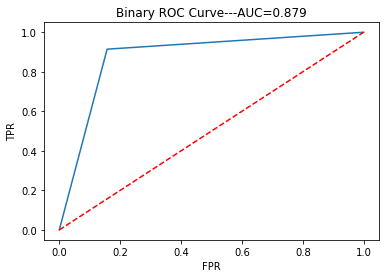

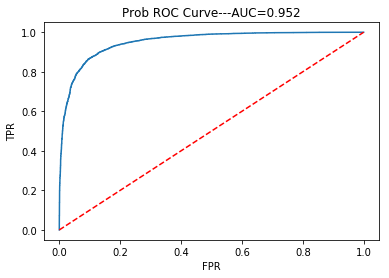

Tiempo : 487.811 segundos


In [20]:
# modelo grad. boost
param={'learning_rate':[0.001, 0.1, 0.5, 1], 'n_estimators':[50, 100, 300]}
grid(gb, param)

Test acierto (mas): 0.85
Mejores parametros: {'activation': 'tanh'}
Mejor acierto cross-val: 0.90

Test exactitud :0.8562



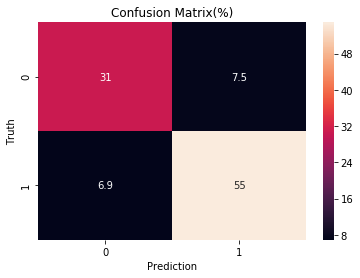

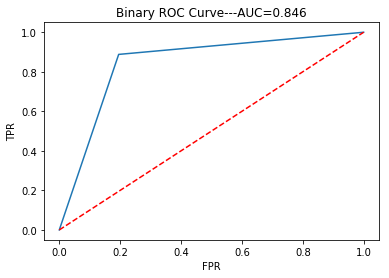

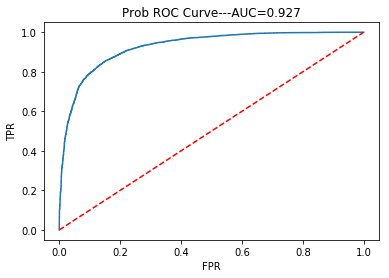

Tiempo : 1321.542 segundos


In [21]:
# modelo perceptron
param={'activation':['relu', 'logistic', 'tanh']}
grid(mlp, param)

Test acierto (mas): 0.88
Mejores parametros: {'gamma': 0.01}
Mejor acierto cross-val: 0.89

Test exactitud :0.8919



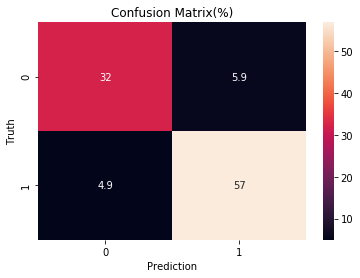

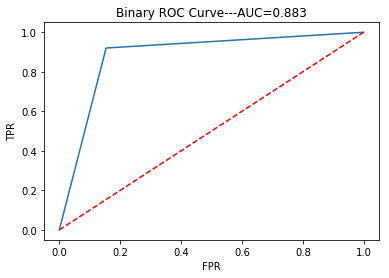

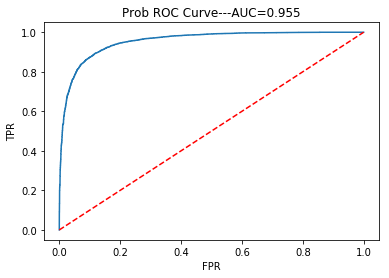

Tiempo : 793.359 segundos


In [22]:
param={'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
grid(xgb, param)

# Resultados

Los resultados muestran que efectivamente existe ese tipo de desintegración, por lo que se puede cuestionar la conservación del 'sabor' leptónico. 